In [1]:
import random
import time
import matplotlib.pyplot as plt

### generateRandomJobs() function provides us N number of jobs randomly within a defined range. Job Tuples are defined as (job_id,deadline,profit) 

In [2]:
def generateRandomJobs(n):
    
    jobs = []

    for i in range(n):
        job_id = random.randint(1,1000)
        deadline = random.randint(1, 2000)
        profit = random.randint(0,500)
        job_tuple = (job_id, deadline, profit)
        jobs.append(job_tuple)

    return jobs

In [3]:
def getJobProfit(job):
    return job[2]

def getJobDeadline(job):
    return job[1]

## Dynamic Programming Algorithm with Bottom up approach for job Scheduling

In [4]:
def jobSchedulingWithDynamicProgramming(jobs):
    # Sort jobs in descending order based on profits
    jobs.sort(key=getJobProfit, reverse=True)

    
    # getting the maximum deadline of jobs
    maximumDeadline = max(jobs, key=getJobDeadline)[1]
    #define a dynamic array for bottom up process  
    dynamic = [0] * (maximumDeadline+1)
    #createing job sequence with max deadline
    jobSequence = [''] * (maximumDeadline+1)

    # Traverse through the jobs at first in bottom up approach
    for job in jobs:
        deadline = job[1]
        profit = job[2]

        # Find the earliest available slot for the current job
        while deadline > 0 and dynamic[deadline] != 0:
            deadline -= 1

        # Update dynamic array and jobSequence lists to sort the jobs in order
        if deadline > 0:
            dynamic[deadline] = profit
            jobSequence[deadline] = job[0]

    # Find the maximum profit and the corresponding job sequence that will be performed seuentially
    maximumProfit = sum(dynamic)
    maximumJobSequence = []
    for job in jobSequence:
        if job != '':
            maximumJobSequence.append(job)

    return maximumProfit, maximumJobSequence

#### resultOfAlgorithm() takes the numberOfJobs and timeRequired Lists to plot the graph where numberOfJobs are plotted in X-axis and timeRequired for corresponding number of jobs are plotted in Y-axis

In [5]:
def resultOfAlgorithm(numberOfJobs,timeRequired):
    #plotting the graph
    plt.plot(numberOfJobs,timeRequired)
    
    plt.xlabel("Number Of Jobs")
    plt.ylabel("Time Required")
    plt.title("Job Scheduling with Dynamic Programming Algorithm")
    plt.show()

Tested for large number of Jobs. numberOfJobs=5000,100000

Note: Enter 0 to end the program and generate Results
5000
Max profit will be: 801408
Job sequence of Execution will be: [333, 73, 513, 736, 703, 341, 638, 290, 369, 861, 459, 352, 231, 573, 547, 944, 67, 826, 710, 580, 960, 566, 916, 545, 513, 351, 358, 675, 163, 828, 705, 858, 814, 740, 6, 190, 922, 939, 282, 264, 628, 122, 84, 959, 63, 359, 158, 787, 768, 751, 615, 931, 633, 894, 759, 476, 430, 404, 483, 262, 441, 982, 281, 374, 414, 329, 516, 1000, 670, 250, 550, 702, 720, 714, 936, 139, 822, 516, 768, 844, 365, 207, 693, 755, 306, 750, 452, 416, 565, 689, 322, 624, 557, 625, 480, 763, 789, 418, 214, 334, 864, 818, 178, 896, 389, 613, 487, 180, 301, 703, 702, 391, 357, 669, 511, 127, 679, 5, 341, 694, 123, 966, 172, 258, 220, 936, 162, 420, 798, 648, 165, 478, 652, 823, 57, 815, 773, 922, 629, 677, 319, 629, 491, 500, 278, 635, 362, 812, 854, 745, 602, 532, 759, 315, 517, 695, 800, 740, 67, 915, 752, 821, 899, 99, 443, 304, 345, 601, 413, 67, 29, 567, 121, 846, 761, 183, 648, 571, 

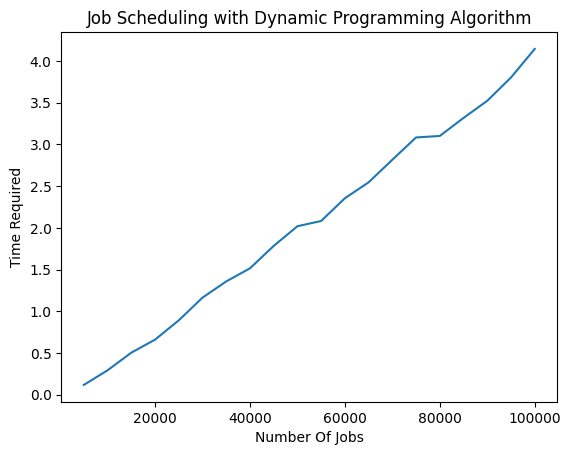

In [6]:
print("Note: Enter 0 to end the program and generate Results")

#initializing matrix for number of jobs and time required
listNumber0fJobs=[]
timeRequired=[]

while True:
    #Enter number of jobs you want to generate
    numberOfJobs=int(input("Enter the number of jobs you want to generate: "))
    if(numberOfJobs==0):
        resultOfAlgorithm(numberOfJobs=listNumber0fJobs,timeRequired=timeRequired)
        break
    print(numberOfJobs)
    listNumber0fJobs.append(numberOfJobs)

    #Generate random jobs using functions
    jobs=generateRandomJobs(numberOfJobs)
    
    startOfExecution=time.time()
    #implementing brute force Algorithm
    maxProfit,jobSequence=jobSchedulingWithDynamicProgramming(jobs=jobs)
    print(f"Max profit will be: {maxProfit}")
    print(f"Job sequence of Execution will be: {jobSequence}")
    endOfExecution=time.time()
    timeRequired.append(round(endOfExecution-startOfExecution,4))